In [1]:
## Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import category_scatter
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
# Read roll call votes from csv into data frame

df_roll_votes = pd.read_csv('Data\\114th Senate Roll Call Votes.csv', index_col=0)
df_roll_votes = df_roll_votes.sort_values('rollnumber', ascending='False').reset_index(drop=True)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,1,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,6,100,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,6,200,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [3]:
# Mapping votes to 'Yea' (from 1), 'Nay' (from 6), 'Abs' (from 7 or 9)
# Mapping party codes for Democrats to 'D' (from 100), for Independents to 'D' (from 328; doing this 
# since both Sens. King and Sanders caucus with Democrats), and for Republicans to 'R' (from 200)

votemap = {1:'Yea', 6:'Nay', 7:'Abs', 9:'Abs'}
partycodemap = {100:'D', 328:'D', 200:'R'}
df_roll_votes['vote'] = df_roll_votes['vote'].map(votemap)
df_roll_votes['party_code'] = df_roll_votes['party_code'].map(partycodemap)
df_roll_votes.head()

,icpsr,id,name,state_abbrev,vote,party_code,rollcallvote_id,chamber,congress,date,rollnumber,description
0,14852,MS11414852,"ROBERTS, Charles Patrick (Pat)",KS,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
1,41305,MS11441305,"KAINE, Timothy Michael (Tim)",VA,Yea,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
2,41304,MS11441304,"CRUZ, Rafael Edward (Ted)",TX,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
3,41303,MS11441303,"HEITKAMP, Mary Kathryn (Heidi)",ND,Nay,D,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.
4,41302,MS11441302,"FISCHER, Debra (Deb)",NE,Nay,R,RS1140001,Senate,114,1/8/2015,1,In the nature of a substitute.


In [4]:
# Pivot on 'name' to create dataframe of senators and their roll votes

df_pivoted = df_roll_votes.pivot(index='name', columns='rollnumber', values='vote')
df_pivoted.columns = df_pivoted.columns.astype(str)
df_pivoted.head()

rollnumber,1,2,3,4,5,6,7,8,9,10,...,493,494,495,496,497,498,499,500,501,502
name,,,,,,,,,,,,,,,,,,,,,
"ALEXANDER, Lamar",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"AYOTTE, Kelly",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BALDWIN, Tammy",Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea
"BARRASSO, John A.",Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
"BENNET, Michael F.",Nay,Yea,Yea,Nay,Nay,Yea,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [5]:
# Create a list of senators and their party

df_party_id = df_roll_votes.drop_duplicates(['name', 'party_code'])
df_party_id = df_party_id[['name', 'party_code']]
df_party_id.head()

,name,party_code
0,"ROBERTS, Charles Patrick (Pat)",R
1,"KAINE, Timothy Michael (Tim)",D
2,"CRUZ, Rafael Edward (Ted)",R
3,"HEITKAMP, Mary Kathryn (Heidi)",D
4,"FISCHER, Debra (Deb)",R


In [6]:
# Add senator's party to dataframe with all of their roll votes

df_votes = pd.merge(df_party_id, df_pivoted, on='name', how='inner')
df_votes.head()

,name,party_code,1,2,3,4,5,6,7,8,...,493,494,495,496,497,498,499,500,501,502
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Nay,Yea,Yea
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea,Yea


In [7]:
# Read supplementary information from csv into dataframe

df_supp_info = pd.read_csv('Data\\Supplementary Senator Info.csv')
df_supp_info.head()

,name,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",59,Female,Rural,No
4,"FISCHER, Debra (Deb)",63,Female,Rural,Yes


In [8]:
# Merge voting information dataframe with supplementary information dataframe

df_unstandardized = pd.merge(df_votes, df_supp_info, on='name', how='inner')
df_unstandardized.head()

,name,party_code,1,2,3,4,5,6,7,8,...,497,498,499,500,501,502,age,gender,urban_rural,born_in_state
0,"ROBERTS, Charles Patrick (Pat)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,78,Male,Rural,Yes
1,"KAINE, Timothy Michael (Tim)",D,Yea,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Yea,Yea,Yea,56,Male,Urban,No
2,"CRUZ, Rafael Edward (Ted)",R,Nay,Yea,Yea,Yea,Yea,Nay,Yea,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,44,Male,Urban,No
3,"HEITKAMP, Mary Kathryn (Heidi)",D,Nay,Yea,Yea,Yea,Nay,Yea,Nay,Nay,...,Yea,Yea,Nay,Nay,Yea,Yea,59,Female,Rural,No
4,"FISCHER, Debra (Deb)",R,Nay,Yea,Yea,Yea,Yea,Yea,Yea,Nay,...,Yea,Yea,Yea,Yea,Yea,Yea,63,Female,Rural,Yes


In [9]:
# One-hot encode categorical variables

num_roll_votes = df_roll_votes['rollnumber'].max()
dummy_col_nums = ['%d' % index for index in range(1,num_roll_votes+1)]
dummy_cols = ['party_code'] + dummy_col_nums + ['gender', 'urban_rural', 'born_in_state']
df_unstandardized_dummies = pd.get_dummies(df_unstandardized, prefix=dummy_cols, columns=dummy_cols)
df_unstandardized_dummies.head()

,name,age,party_code_D,party_code_R,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",78,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",56,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",44,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",59,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",63,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,1


In [10]:
# Standardize age column before doing PCA

senator_age = df_unstandardized_dummies['age'].astype(float)
senator_age_standardized = pd.DataFrame(preprocessing.scale(senator_age), columns=['age'])

df_standardized = pd.concat([df_unstandardized_dummies['name'], senator_age_standardized, df_unstandardized_dummies.iloc[:,2:]], axis=1)
df_standardized.head()

,name,age,party_code_D,party_code_R,1_Abs,1_Nay,1_Yea,2_Abs,2_Nay,2_Yea,...,501_Yea,502_Abs,502_Nay,502_Yea,gender_Female,gender_Male,urban_rural_Rural,urban_rural_Urban,born_in_state_No,born_in_state_Yes
0,"ROBERTS, Charles Patrick (Pat)",1.636745,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
1,"KAINE, Timothy Michael (Tim)",-0.447074,1,0,0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0
2,"CRUZ, Rafael Edward (Ted)",-1.583703,0,1,0,1,0,0,0,1,...,1,0,0,1,0,1,0,1,1,0
3,"HEITKAMP, Mary Kathryn (Heidi)",-0.162917,1,0,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,1,0
4,"FISCHER, Debra (Deb)",0.215959,0,1,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,1


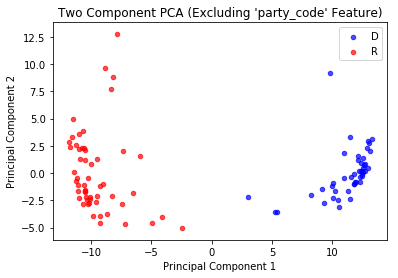

In [11]:
# Two component PCA, excluding 'party_code' in PCA

cols_to_exclude = ['name', 'party_code_D', 'party_code_R']
columns_to_include = [header for header in df_standardized.columns if not header in cols_to_exclude]

pca_no_party_label = PCA(n_components=2)
principalComponents_no_party_label = pca_no_party_label.fit_transform(df_standardized[columns_to_include])
df_principal_no_party_label = pd.DataFrame(data=principalComponents_no_party_label, columns=['Principal Component 1', 'Principal Component 2'])

df_final_no_party_label = pd.concat([df_party_id, df_principal_no_party_label], axis=1)

# Plotting PC1 against PC2, colored by party label
col = ('blue', 'red')
fig = category_scatter(x='Principal Component 1', y='Principal Component 2', label_col='party_code', 
                       colors=col, data=df_final_no_party_label, markers='o', legend_loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Two Component PCA (Excluding \'party_code\' Feature)')
plt.show()

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Circle support vector points (i.e., data points on margins)
    for index in range(len(model.support_vectors_)):
        ax.plot(model.support_vectors_[index][0], model.support_vectors_[index][1], 'ko', 
                fillstyle='none', markersize=20, markeredgewidth=2)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

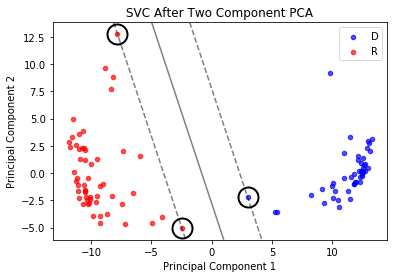

In [13]:
# Linear discriminative support vector classification

linearsvcmodel = SVC(kernel='linear', C=1E10) # Instantiating linear SVC
linearsvcmodel.fit(df_principal_no_party_label, df_party_id['party_code']) # Fitting linear SVC model

# Plotting first two principal components, SVM decision boundary, and SVM margins

fig = category_scatter(x='Principal Component 1', y='Principal Component 2', label_col='party_code', 
                       colors=col, data=df_final_no_party_label, markers='o', legend_loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVC After Two Component PCA')
plot_svc_decision_function(linearsvcmodel)

In [14]:
# Which senators correspond to the support vector points?

supportVectorPC1s = list(linearsvcmodel.support_vectors_[:,0])

print df_final_no_party_label.loc[df_final_no_party_label['Principal Component 1'].isin(supportVectorPC1s)]

                         name party_code  Principal Component 1  \
2   CRUZ, Rafael Edward (Ted)          R              -7.806151   
21    COLLINS, Susan Margaret          R              -2.457515   
32          MANCHIN, Joe, III          D               2.996001   

    Principal Component 2  
2               12.776812  
21              -5.063419  
32              -2.219970  
